<h2 style="font-family: 'Times New Roman'; font-weight: bold;">1 - INTRODUCTION<h2>

In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

dataset = pd.read_csv("dataset/NVDA.csv", nrows=800);
colors = ['coral', 'deepskyblue', 'deeppink'];
description = "Cours d\'action NVIDIA Corp";
xcol = "Date";
ycol = "Volume";

def seedDataset(dataset, percentage = 90):
    if(percentage > 50):
        return {"training": dataset[:(len(dataset)*percentage)//100], "test": dataset[(len(dataset)*percentage)//100:]}
    else:
        return {"training": dataset[:((1 - percentage)*len(dataset))//100], "test": dataset[(((1 - percentage)*len(dataset))//100):]}

<h3 style="font-family: 'Times New Roman';">a) <u>Représentation</u></h3>

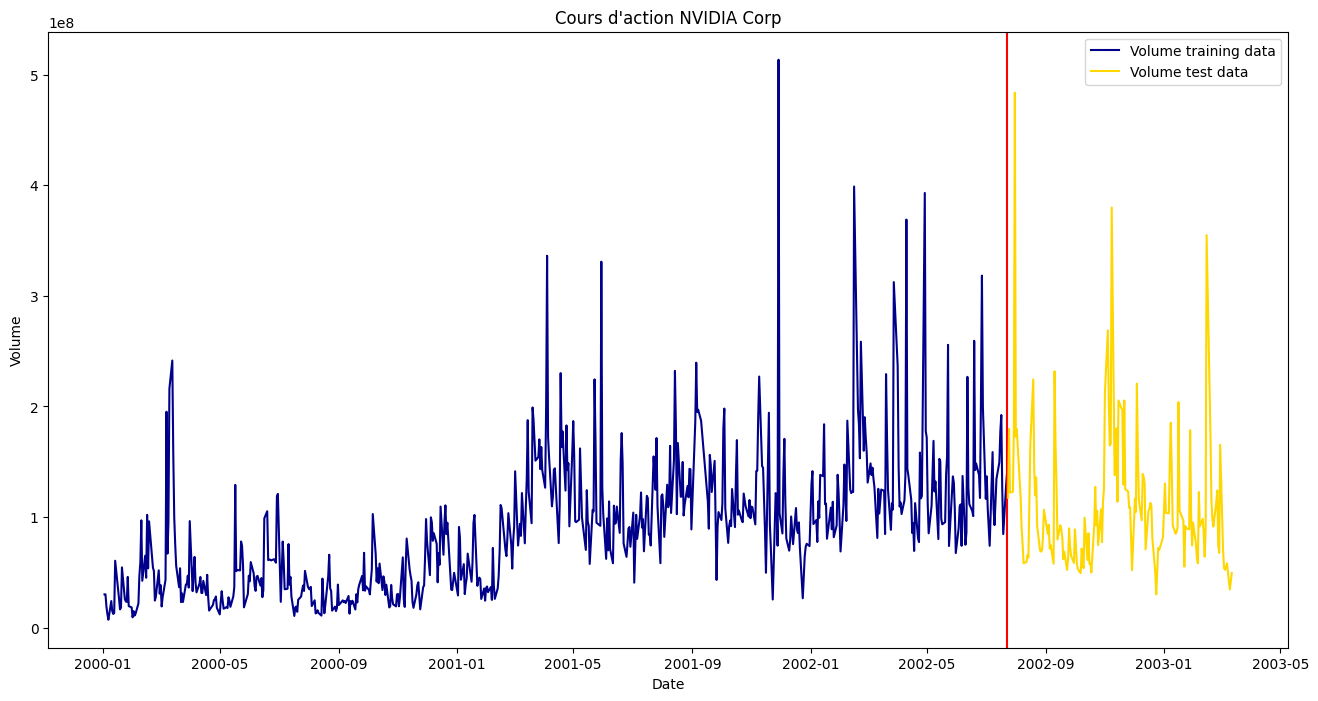

In [6]:
seed_dataset = seedDataset(dataset, 80);
training_dataset = seed_dataset["training"];
test_dataset = seed_dataset["test"];
training_length = len(training_dataset);
test_length = len(test_dataset);

plt.figure(figsize=(16, 8));
plt.title(label=description);
plt.plot(pd.to_datetime(training_dataset[xcol]), training_dataset[ycol], label=f"{ycol} training data", c="darkblue");
plt.axvline(x=pd.to_datetime(training_dataset[xcol][training_length - 1]), c='r');
plt.plot(pd.to_datetime(test_dataset[xcol]), test_dataset[ycol], label=f"{ycol} test data", c="gold");
plt.legend();
plt.xlabel(xcol);
plt.ylabel(ycol);
plt.show();

<h2 style="font-family: 'Times New Roman'; font-weight: bold;">2 - Méthode de prévision: lissage exponentiel</h2>